# Задача
В этой работе вам предлагается решить задачу регрессии, а именно построить алгоритм, определяющий качество вина на основе физико-химических тестов:
 - fixed acidity
 - volatile acidity
 - citric acid
 - residual sugar
 - chlorides
 - free sulfur dioxide
 - total sulfur dioxide
 - density
 - pH
 - sulphates
 - alcohol

Более подробно про признаки можно почитать [здесь](https://archive.ics.uci.edu/ml/datasets/wine+quality). Целевой признак записан в переменной *quality*.

В этой задаче для обучения будут использовать 2 алгоритма:
- [DecisonTree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
- [AdaBoostRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor)

# Решение

Загрузите набор данных *winequality-red.csv* с помощью `pandas` (скачать можно [здесь](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv), или с помощью скрипта ниже). Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [114]:
from google.colab import files

files.upload()

Saving wine_data.csv to wine_data (2).csv


{'wine_data (2).csv': b'"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"\r\n7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5\r\n7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5\r\n7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5\r\n11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6\r\n7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5\r\n7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5\r\n7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;5\r\n7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7\r\n7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7\r\n7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5\r\n6.7;0.58;0.08;1.8;0.097;15;65;0.9959;3.28;0.54;9.2;5\r\n7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5\r\n5.6;0.615;0;1.6;0.089;16;59;0.9943;3.58;0.52;9.9;5\r\n7.8;0.61;0.29;1.6;0.114;9;29;0.9974;3.26;1.56;9.1;5\r\n8.9;0.62;0.18;3.8;0.176;52;145;0.9986;3.16;0.88

In [115]:
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv -O wine.csv
# your code here

#DATASET_PATH = './wine.csv'

In [116]:
df = pd.read_csv('wine_data.csv', delimiter=';')

In [117]:

df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


## Анализ и предобработка данных

Обычно после загрузки датасета всегда необходима его некоторая предобработка. В данном случае она будет заключаться в следующем:
1. Проверьте есть ли в данных пропущенные значения. Удалите из выборки все объекты с пропусками и дубликаты.
2. Выделите 70% выборки для обучения и дальнейшего анализа.
3. Проанализируйте признаки и по необходимости предобработайте их. Все шаги предобработки поясните текстом.
4. Целевую переменную (ту, которую мы хотим предсказывать) можно выделить в отдельную переменную (НЕ забудьте удалить ее из датасета, когда будете обучать модель).

In [118]:
# your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [119]:
df = df.drop_duplicates()
df.info()
# null'ов нет, так что dropna можно и не делать

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['quality']),
                                                    df['quality'],
                                                    test_size=0.3,
                                                    random_state=42)
print(X_train.shape)


print(y_test.shape)
#выделили 70 и 30% на обучение и на тест

(951, 11)
(408,)


In [122]:
X_test.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,8.316667,0.531716,0.271471,2.608824,0.087083,16.357843,46.787990,0.996731,3.312206,0.663480,10.465237
std,1.784059,0.196672,0.196014,1.634553,0.048888,10.841980,32.991582,0.001984,0.167474,0.172268,1.078242
min,4.900000,0.120000,0.000000,1.200000,0.034000,1.000000,8.000000,0.990800,2.740000,0.370000,8.800000
25%,7.100000,0.377500,0.090000,1.900000,0.068000,7.000000,23.750000,0.995517,3.200000,0.550000,9.500000
50%,7.900000,0.515000,0.260000,2.200000,0.078500,14.000000,39.000000,0.996645,3.310000,0.620000,10.200000
75%,9.400000,0.645000,0.430000,2.600000,0.090250,23.000000,60.000000,0.997900,3.400000,0.740000,11.200000
max,15.600000,1.330000,1.000000,15.500000,0.610000,68.000000,278.000000,1.003690,4.010000,2.000000,14.000000


## Обучение модели регрессии

Постройте модель регрессии, используя 2 алгоритма:
- [DecisonTree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
- [AdaBoostRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor)

Для начала используйте гиперпараметры по умолчанию.

Рассчитайте среднее качество кросс-валидации модели как долю дисперсии зависимой переменной (коэффициент детерминации) $R^2$. Каким получилось качество? Какой алгоритм вы бы выбрали для дальнейшей работы? Обоснуйте свой выбор.

Без кросс-валидации (по заданию можно вообще не делать, поздно увидел, что надо только с кросс-валидацией)

In [123]:
# your code here
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train, y_train)
dt.score(X_train, y_train), dt.score(X_test, y_test) #Дерево явно переобучено: не тренировке R**2 == 1, на тесте очень мал

(1.0, -0.27483023389996)

In [124]:
from sklearn.ensemble import AdaBoostRegressor

regr = AdaBoostRegressor(random_state=1)
regr.fit(X_train, y_train)
regr.score(X_train, y_train), regr.score(X_test, y_test)

(0.46164465111693986, 0.4382230285967007)

Теперь с кросс-валидацией

In [125]:
from sklearn.model_selection import cross_val_score

In [126]:
dt_cv_res = cross_val_score(dt, X_train, y_train, scoring='r2').mean()
print(dt_cv_res)

-0.21573532481708071


In [127]:
regr_cv_res = cross_val_score(regr, X_train, y_train, scoring= "r2").mean()
print(regr_cv_res)

0.3292518792471713


**Несмотря на то что на тренировочных значениях лучше себя показало дерево решений, оно явно переобучено. Нормальный показатель для него ~0.8-0.9, никак не 1, значение на тестовой выборке это лишь подтверждают
Явно лучше будет выбрать**

Теперь сделаем подбор оптимальных гиперпараметров. Сделайте поиск по сетке с помощью кросс-валидации. Изменилось ли качество алгоритмов? Почему?

In [128]:
from sklearn.model_selection import GridSearchCV

**Поиск оптимальных гиперпараметров**

In [129]:
arr_1 = range(50, 151, 25)
arr_2 = [x / 10.0 for x in range(1, 15, 3)]

In [130]:
ab_param_grid = {
    'n_estimators': arr_1,
    'learning_rate': arr_2,
    'loss' : ['linear', 'square', 'exponential']
}

In [131]:
# your code here
grid_ab = GridSearchCV(estimator = AdaBoostRegressor(random_state = 1),
                        param_grid = ab_param_grid,
                        scoring = 'r2',
                        cv = 5,
                        n_jobs = -1)

grid_ab.fit(X_train, y_train)
best_ab = grid_ab.best_estimator_
best_ab_score = grid_ab.best_score_

print('Лучшие параметры AdaBoost')
print(grid_ab.best_estimator_)
print(best_ab_score)



Лучшие параметры AdaBoost
AdaBoostRegressor(learning_rate=0.4, loss='exponential', n_estimators=75,
                  random_state=1)
0.34544630984051616


Оцените скорость обучения каждого из алгоритмов. Для этого воспользуйтесь графиком вида "ящик с усами", который отражает среднее время обучения алгоритма при фиксированном значении гиперпараметров. Что вы можете сказать о скорости работы алгоритмов? Почему наблюдаются такие результаты? Можно ли ускорить? Если да, то каким образом?

In [132]:
import time
import seaborn as sns

In [133]:
# your code here
def tr_time(model, X, Y):
    start_time = time.time()
    model.fit(X, Y)
    return time.time() - start_time

In [134]:
times_ab = []

for n_estimators in ab_param_grid['n_estimators']:
    for learning_rate in ab_param_grid['learning_rate']:
      for loss in ab_param_grid['loss']:
        model = AdaBoostRegressor(n_estimators = n_estimators,
                                  learning_rate = learning_rate,
                                  random_state = 1)
        training_time = tr_time(model,
                                X_train,
                                y_train)
        times_ab.append({'n_estimators': n_estimators,
                         'learning_rate': learning_rate,
                         'loss' : loss,
                         'training_time': training_time
                         })
#print(times_ab)

<Axes: xlabel='n_estimators', ylabel='training_time'>

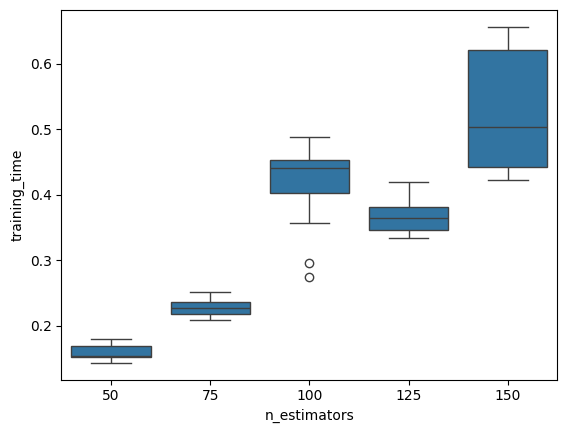

In [135]:
ab_times = pd.DataFrame(times_ab)
#ab_times.head()
sns.boxplot(x='n_estimators', y='training_time', data= ab_times)

<Axes: xlabel='learning_rate', ylabel='training_time'>

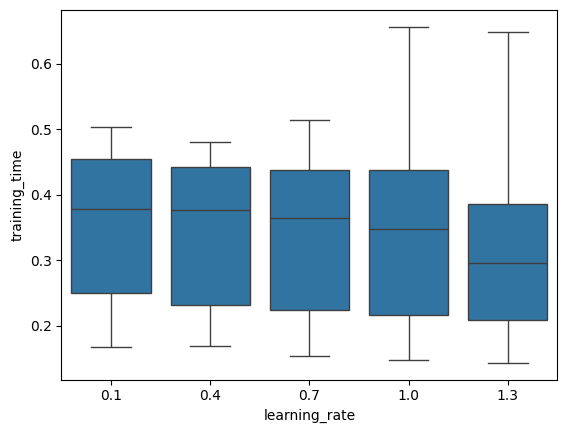

In [136]:
sns.boxplot(x='learning_rate', y='training_time', data= ab_times)

<Axes: xlabel='loss', ylabel='training_time'>

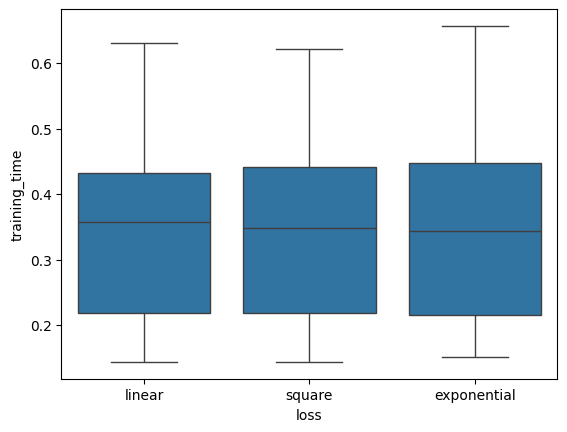

In [137]:
sns.boxplot(x='loss', y='training_time', data= ab_times)

## PCA преобразование

Теперь попробуем сделать преобразрование данных с помощью PCA. Выберите оптимальное количество компонент и преобразуйте данные. Объясните свой выбор.

In [138]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [139]:
# your code here
scaler = StandardScaler()
X_scl = scaler.fit_transform(X_train)
pca = PCA()
pca.fit(X_scl)

PCA()

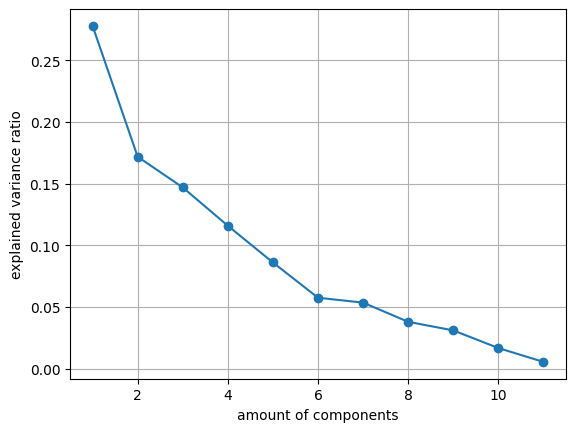

In [140]:

plt.plot(range(1, len(explained_variance) + 1), pca.explained_variance_ratio_, marker = 'o')
plt.xlabel('amount of components')
plt.ylabel('explained variance ratio')
plt.grid()

**Можно сохранить 95% доли объясненной дисперсии. Т.о. мы сократим размерность, но оставим большую часть информации. Т.е. оставим 8 компонент**

In [141]:
pca = PCA(n_components = 8)
X_scl = pca.fit_transform(X_scl)

## Обучение моделей на данных, трансформированных с помощью PCA

Обучим те же классификаторы на трансформированных с помощью PCA данных. Подберите оптимальные значения исследуемых гиперпараметров для новых данных. Какой алгоритм справился лучше? Какой быстрее? Почему?

In [142]:
# your code here
times_ab_pca = []

for n_estimators in ab_param_grid['n_estimators']:
    for learning_rate in ab_param_grid['learning_rate']:
      for loss in ab_param_grid['loss']:
        model = AdaBoostRegressor(n_estimators = n_estimators,
                                  learning_rate = learning_rate,
                                  random_state = 1)
        training_time = tr_time(model,
                                X_scl,
                                y_train)
        times_ab_pca.append({'n_estimators': n_estimators,
                         'learning_rate': learning_rate,
                         'loss' : loss,
                         'training_time': training_time
                         })


In [143]:
arr_1 = range(50, 100, 25)
arr_2 = [x / 10.0 for x in range(1, 15, 3)]

ab_param_grid = {
    'n_estimators': arr_1,
    'learning_rate': arr_2,
    'loss' : ['linear', 'square', 'exponential']
}

grid_ab = GridSearchCV(estimator=AdaBoostRegressor(random_state=1),
                        param_grid=ab_param_grid,
                        scoring='r2',
                        cv=5,
                        n_jobs=-1)

grid_ab.fit(X_scl, y_train)
best_ab = grid_ab.best_estimator_
best_ab_score = grid_ab.best_score_

print('Лучшие параметры AdaBoost with PCA')
print(grid_ab.best_estimator_)
print(best_ab_score)

Лучшие параметры AdaBoost with PCA
AdaBoostRegressor(learning_rate=0.1, loss='square', n_estimators=75,
                  random_state=1)
0.2974015819293635


## Сравнение результатов

Сравните результаты полученные до трансформации данных с помощью PCA и после. Для этого воспользуйтесь "ящиком с усами" (boxplot).

Сделайте общие итоговые выводы о моделях регрессии с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

In [144]:
# your code here
ab_pca_times = pd.DataFrame(times_ab_pca)
ab_pca_times['PCA'] = "Yes"
ab_times["PCA"] = 'No'

In [145]:
frames = [ab_times, ab_pca_times]

all_times = pd.concat(frames)

#all_times = pd.concat(ab_times, ab_pca_times)
#all_times.head()

<Axes: xlabel='PCA', ylabel='training_time'>

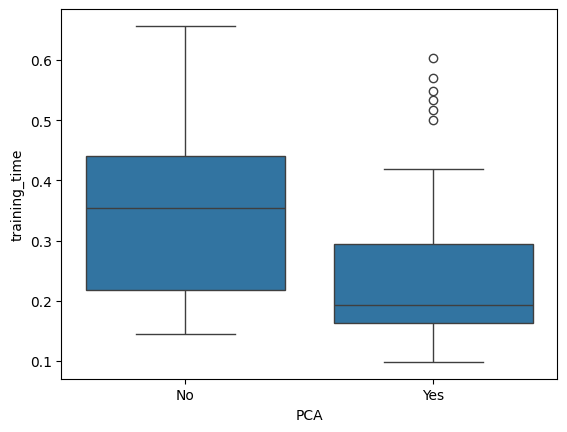

In [146]:
sns.boxplot(x='PCA', y='training_time', data= all_times)

Параметры: n_estimators, learning_rate, loss. Время сократилось примерно в 1,5 раза, но при этом и метрика R^2 упала с 0.345 до 0.297. При этом после примерения PCA изменились оптимальные параметры:


До PCA: learning_rate=0.4, loss='exponential', n_estimators=75

После learning_rate=0.1, loss='square', n_estimators=75



## Тестирование всех модели

Протестируйте все построенные модели (в т.ч. с и без PCA трансформации) на данных, которые были отложены для теста (их должно было остаться 30%). Не забудьте про все необходимые преобразования.

In [147]:
#Дерево решений, которое не пошло дальше

dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train, y_train)

print(f'Метрика R^2 для Decison Tree с параметрами по умолчанию: {dt.score(X_test, y_test):.2f}')

Метрика R^2 для Decison Tree с параметрами по умолчанию: -0.27


In [148]:
#Ada Boost без PCA с оптимальными параметрами
regr = AdaBoostRegressor(learning_rate=0.7,
                         loss='square',
                         n_estimators=75,
                         random_state = 1)
regr.fit(X_train, y_train)
print(f'Метрика R^2 для Ada Boost без PCA с оптимальными параметрами: {regr.score(X_test, y_test):.2f}')


Метрика R^2 для Ada Boost без PCA с оптимальными параметрами: 0.43


In [149]:
#Ada Boost с PCA с оптимальными параметрами
X_test_scl = scaler.fit_transform(X_test)
pca = PCA()
pca.fit(X_test_scl)

pca = PCA(n_components = 8)
X_test_scl = pca.fit_transform(X_test_scl)

regr = AdaBoostRegressor(learning_rate=0.4,
                         loss='exponential',
                         n_estimators=75,
                         random_state = 1)
regr.fit(X_test_scl, y_test)
print(f'Метрика R^2 для Ada Boost c PCA с оптимальными параметрами: {regr.score(X_test_scl, y_test):.2f}')



Метрика R^2 для Ada Boost c PCA с оптимальными параметрами: 0.58
